# Demand Forecasting In Retail

**Name:** Safa Mariyam

**Organization:** Entri Elevate

**Date:** [Evaluation Date]

## Overview of Problem Statement

Retail businesses face challenges in accurately predicting demand to balance inventory and sales. Overestimating demand leads to overstocking and financial losses, while underestimating results in stockouts and missed opportunities. To ensure smooth operations and customer satisfaction, a robust demand forecasting model is required to optimize inventory management and supply chain efficiency.



## Objective

To develop a machine learning model to predict future demand for product categories in a retail environment. By leveraging historical data, the project aims to identify significant factors influencing demand and accurately predict future demand.

The key goals are:

* **Identify Significant Factors:** Determine the variables that significantly influence demand forecasts in retail.
* **Build Predictive Models:** Develop machine learning models to accurately predict demand based on independent variables.
* **Evaluate Model Performance:** Compare various models to identify the best one for accurate demand forecasting and actionable insights.

## Data Description

**Source Of Data:** The dataset has been sourced from Kaggle, a platform providing public datasets for data analysis and machine learning projects.

**Shape:**

    Rows: 73100
    Columns: 15


**Features:**
* **Date:**  Daily records from [start_date] to [end_date].
* **Store ID:** Unique identifier for each store.
* **Product ID:** Unique identifier for products.
* **Category:** Product category (e.g., Groceries, Electronics).
* **Region**: Geographical region where the store is located.
* **Inventory Level**: Current stock levels.
* **Units Sold:** Units sold during the day.
* **Units Ordered:** Quantity of products ordered.
* **Price:** Selling price of the product.
* **Discount:** Discount percentage applied.
* **Weather Condition:** Daily weather impacting sales(e.g., Rainy, Sunny).
* **Holiday/Promotion:** Binary indicator for holidays or promotions.
* **Competitor Pricing:** Competitor product price.
* **Seasonality:** Seasonal trends (e.g., Summer, Autumn).
* **Demand Forecast:** Predicted demand based on past trends.

## Data Collection

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from scipy.stats import uniform
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [8]:
data = pd.read_csv("Retail_Store_Inventory.csv")

In [9]:
df= pd.DataFrame(data)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [11]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-01-2022,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,01-01-2022,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,01-01-2022,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,01-01-2022,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,01-01-2022,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [12]:
df.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,01-01-2024,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,01-01-2024,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,01-01-2024,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,01-01-2024,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,01-01-2024,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [13]:
df.shape

(73100, 15)

In [14]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [15]:
df.describe(include='object').T

,count,unique,top,freq
Date,73100,731,01-01-2022,100
Store ID,73100,5,S001,14620
Product ID,73100,20,P0001,3655
Category,73100,5,Furniture,14699
Region,73100,4,East,18349
Weather Condition,73100,4,Sunny,18290
Seasonality,73100,4,Spring,18317


**Renaming some columns**

In [16]:
df = df.rename(columns={'Inventory Level': 'Inventory', 
                        'Units Sold': 'Sales', 
                        'Units Ordered': 'Orders', 
                        'Demand Forecast': 'Demand', 
                        'Weather Condition': 'Weather', 
                        'Holiday/Promotion': 'Promotion', })

In [17]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory',
       'Sales', 'Orders', 'Demand', 'Price', 'Discount', 'Weather',
       'Promotion', 'Competitor Pricing', 'Seasonality'],
      dtype='object')

## Data Preprocessing

**Dropping date and Id columns**

In [18]:
df.drop(columns = ['Date', 'Product ID', 'Store ID'],inplace=True)

In [19]:
df.head()

,Category,Region,Inventory,Sales,Orders,Demand,Price,Discount,Weather,Promotion,Competitor Pricing,Seasonality
0,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [20]:
#Numerical features
num_cols = df.select_dtypes(include='number').columns
print("Total Numerical Features:",num_cols.shape)
print("Numeric Features:",num_cols)

Total Numerical Features: (8,)
Numeric Features: Index(['Inventory', 'Sales', 'Orders', 'Demand', 'Price', 'Discount',
       'Promotion', 'Competitor Pricing'],
      dtype='object')


In [21]:
#Categoriccal features
cat_cols = df.select_dtypes(include='object').columns
print("Total Categorical Features:",cat_cols.shape)
print("Categorical Features:",cat_cols)

Total Categorical Features: (4,)
Categorical Features: Index(['Category', 'Region', 'Weather', 'Seasonality'], dtype='object')


In [22]:
df.columns

Index(['Category', 'Region', 'Inventory', 'Sales', 'Orders', 'Demand', 'Price',
       'Discount', 'Weather', 'Promotion', 'Competitor Pricing',
       'Seasonality'],
      dtype='object')

In [23]:
#Displaying feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            73100 non-null  object 
 1   Region              73100 non-null  object 
 2   Inventory           73100 non-null  int64  
 3   Sales               73100 non-null  int64  
 4   Orders              73100 non-null  int64  
 5   Demand              73100 non-null  float64
 6   Price               73100 non-null  float64
 7   Discount            73100 non-null  int64  
 8   Weather             73100 non-null  object 
 9   Promotion           73100 non-null  int64  
 10  Competitor Pricing  73100 non-null  float64
 11  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 6.7+ MB


**Checking for duplicates**

In [24]:
df.duplicated().sum()

0

No duplicated values found.

**Checking for null values**

In [25]:
df.isnull().sum()

Category              0
Region                0
Inventory             0
Sales                 0
Orders                0
Demand                0
Price                 0
Discount              0
Weather               0
Promotion             0
Competitor Pricing    0
Seasonality           0
dtype: int64

Null values was not found.

**Checking for outliers**

In [26]:
# Calculate Q1, Q3, and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
Inventory               0
Sales                 715
Orders                  0
Demand                732
Price                   0
Discount                0
Promotion               0
Competitor Pricing      0
dtype: int64


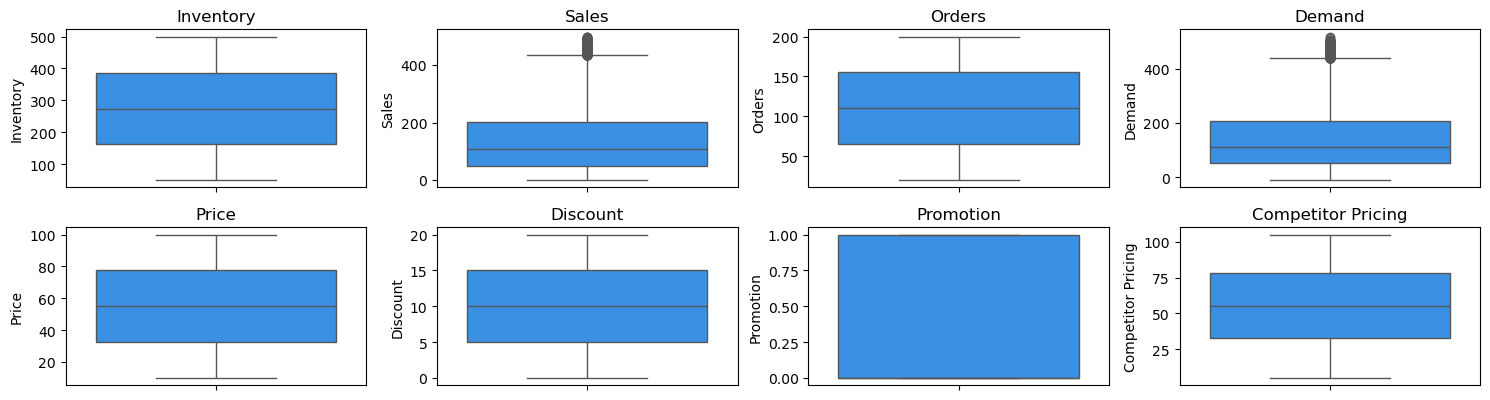

In [27]:
# BoxPlot for outlier detection
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [28]:
df1 = df.copy()

**Handling Outliers**

In [29]:
# Cap outliers to the threshold values (IQR method)
df1[num_cols] = df1[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Shape after capping outliers:", df1[num_cols].shape)


Shape after capping outliers: (73100, 8)


**BoxPlot after handling outliers**

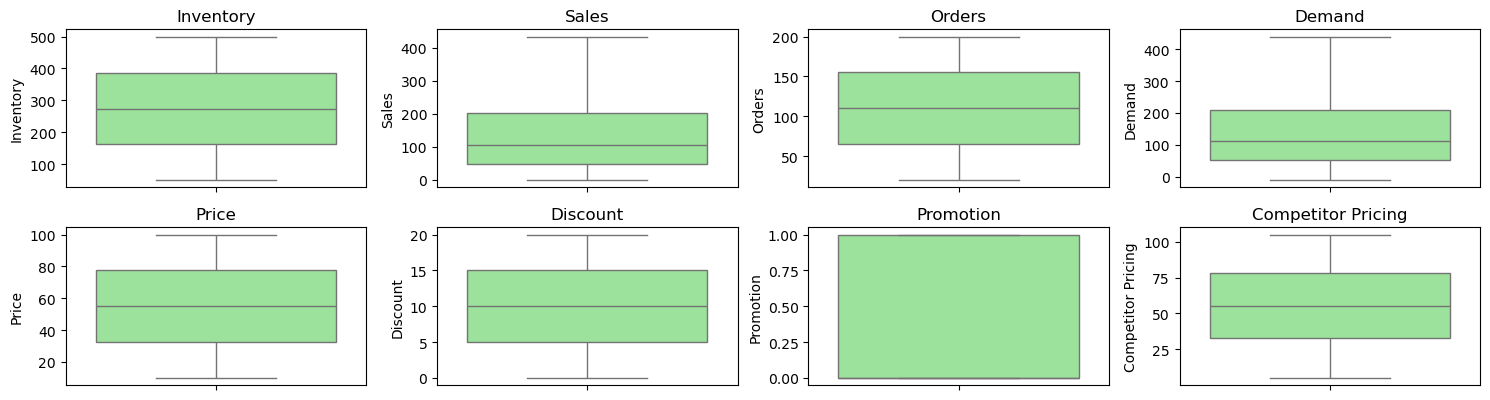

In [30]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

**Addressing Skewness**

In [31]:
skewness = df[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)

Skewness of Numeric Columns:
 Inventory             0.010116
Sales                 0.905333
Orders                0.003787
Demand                0.894852
Price                -0.002732
Discount             -0.001828
Promotion             0.010780
Competitor Pricing   -0.002166
dtype: float64

No Skewness:
 Inventory             0.010116
Orders                0.003787
Price                -0.002732
Discount             -0.001828
Promotion             0.010780
Competitor Pricing   -0.002166
dtype: float64

Moderate Skewness:
 Sales     0.905333
Demand    0.894852
dtype: float64

High Skewness:
 Series([], dtype: float64)


**Histogram of features with skewness**

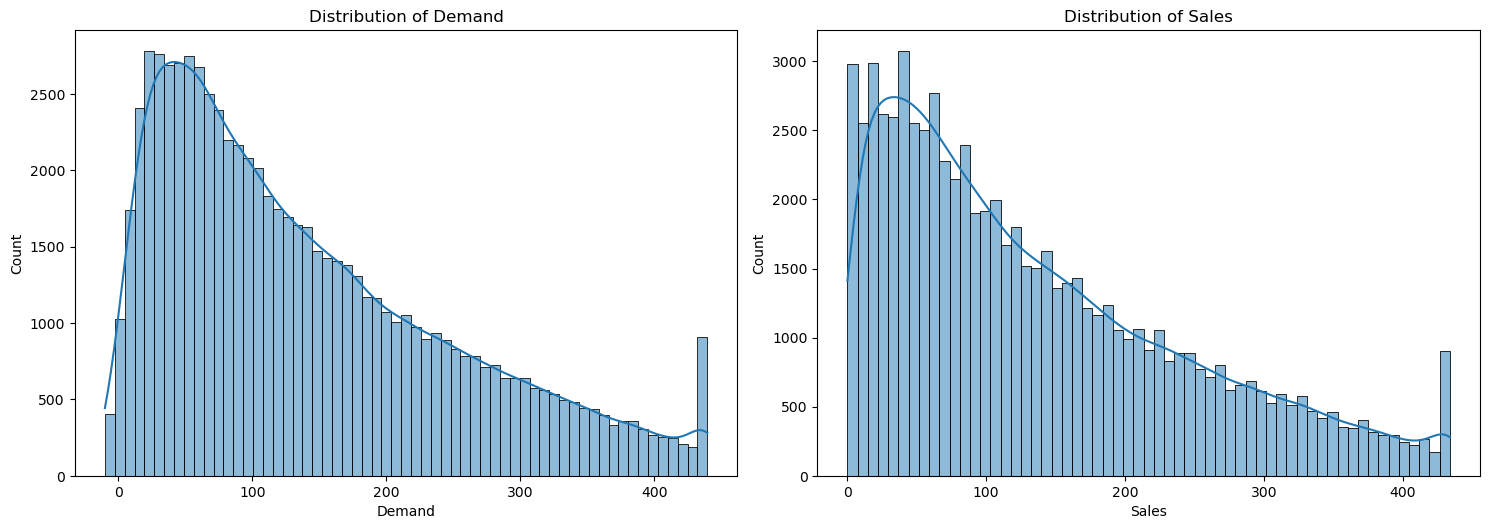

In [32]:
plt.figure(figsize=(15, 10))

# Loop through the desired columns
for i, col in enumerate(['Demand', 'Sales'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df1[col], kde=True) 
    plt.title(f'Distribution of {col}') 

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [33]:
#Applying Square root transfomation
df1['Sales'] = np.sqrt(df1['Sales'])
df1['Demand'] = np.sqrt(df1['Demand'])

skewness = df1[['Sales', 'Demand']].skew()
print("Skewness after transformation:\n", skewness)

Skewness after transformation:
 Sales     0.123615
Demand    0.180742
dtype: float64


In [34]:
df1[['Sales', 'Demand']].isnull().sum()

Sales       0
Demand    673
dtype: int64

In [35]:
df1['Demand'] = df1['Demand'].fillna(df1['Demand'].median())
df1['Demand'].isnull().sum()

0

## Exploratory Data Analysis

**Analysing numerical columns**

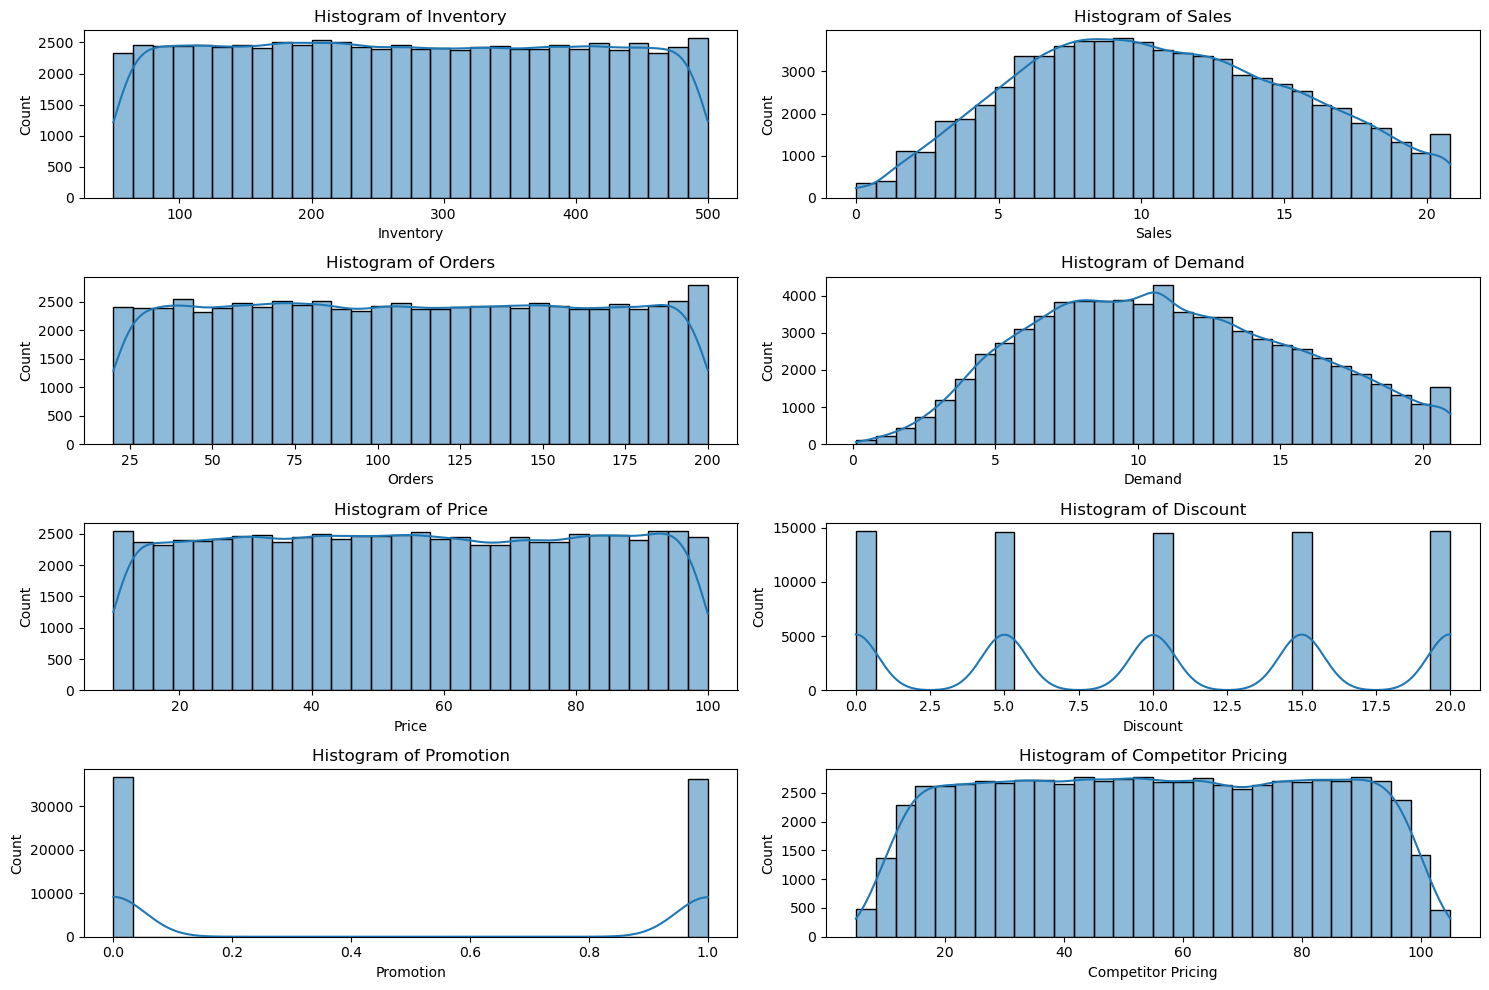

In [36]:
# Distribution of Features for Skewness Analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()     

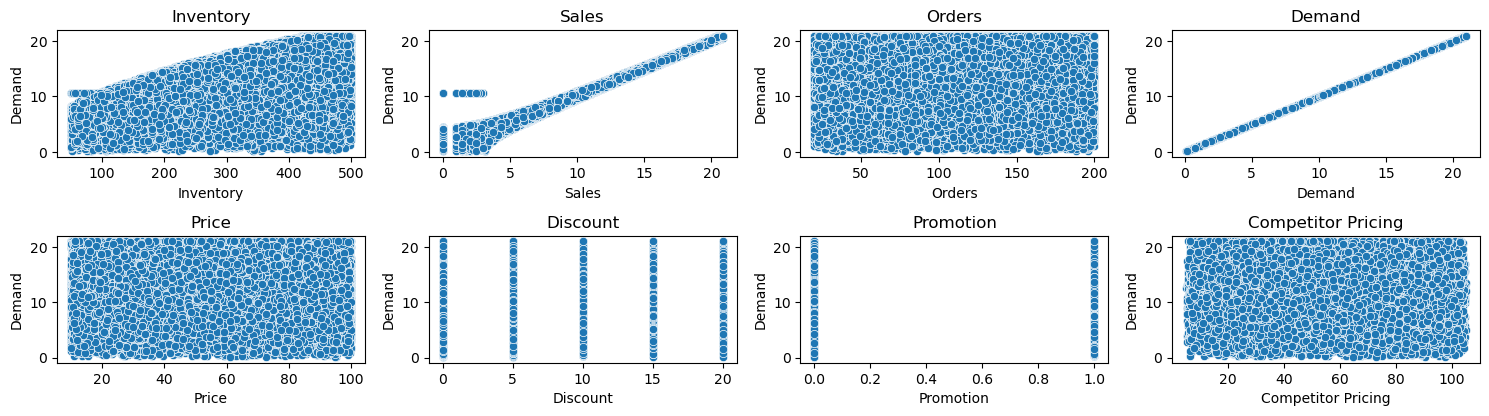

In [37]:
# ScatterPlot for relationship between features and demand
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df1,x=col,y='Demand')
    plt.title(col)
    plt.xlabel(col)
plt.tight_layout()
plt.savefig("Scatter.png")
plt.show()

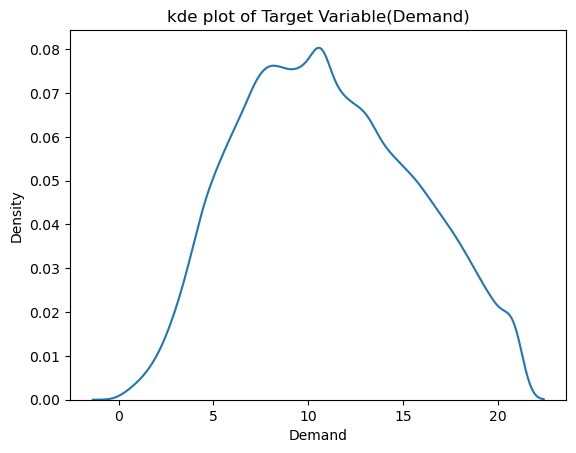

In [38]:
# kde Plot
sns.kdeplot(df1.Demand)
plt.title("kde plot of Target Variable(Demand)")
plt.show()

In [39]:
#Heatmap for Correlation
corr1 = df1[num_cols].corr()

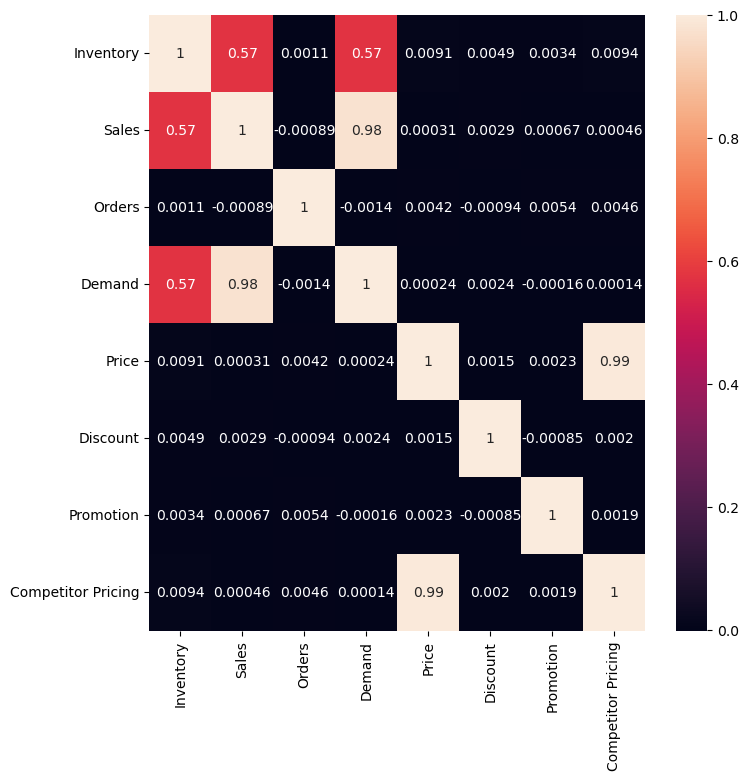

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(corr1, annot=True)
plt.savefig("corre.png")
plt.show()

**Analysing Categorical Columns**

In [41]:
# Checking the number of unique values in each categorical column
unique_counts = df1[cat_cols].nunique()
unique_counts

Category       5
Region         4
Weather        4
Seasonality    4
dtype: int64

Distribution of Category:
Category
Furniture      14699
Toys           14643
Clothing       14626
Groceries      14611
Electronics    14521
Name: count, dtype: int64


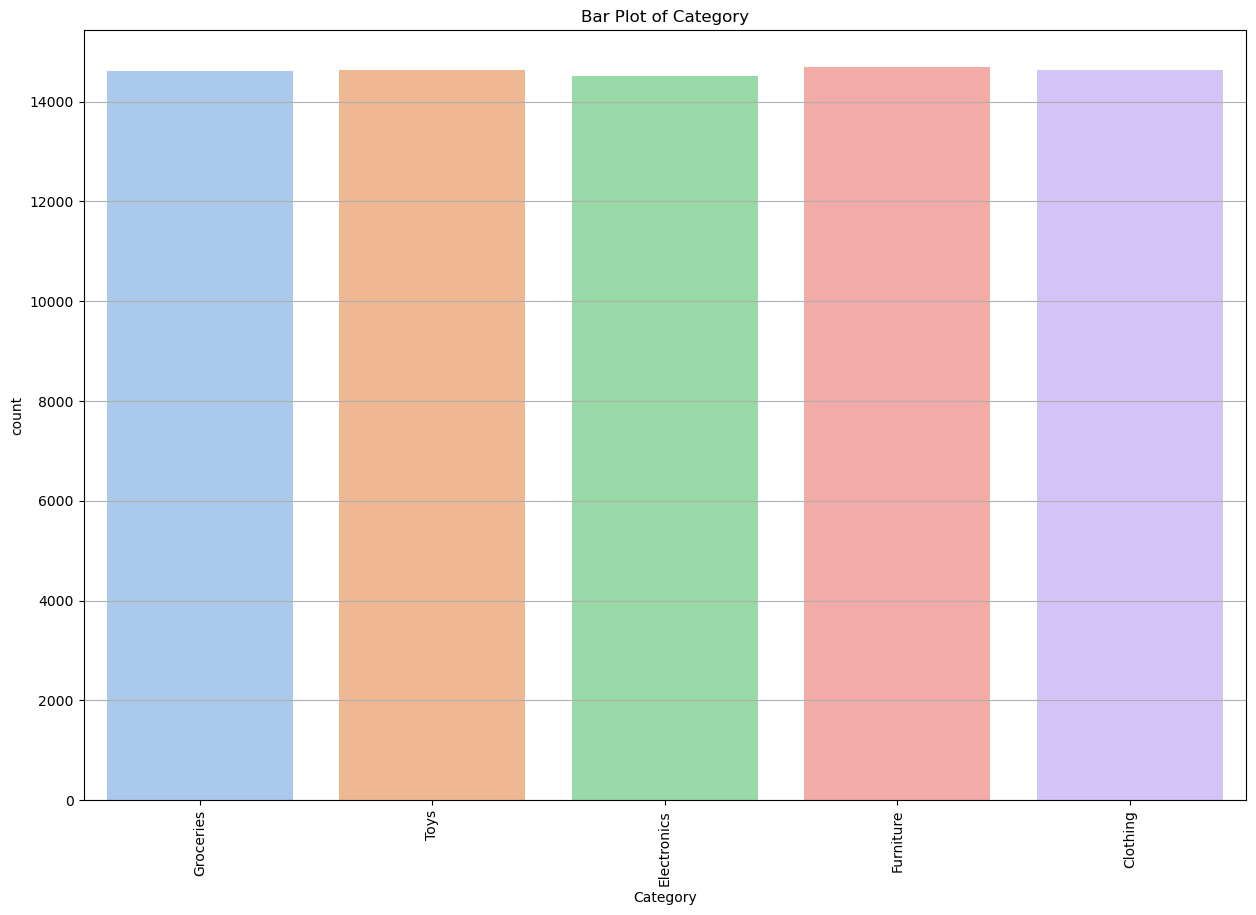

Distribution of Region:
Region
East     18349
South    18297
North    18228
West     18226
Name: count, dtype: int64


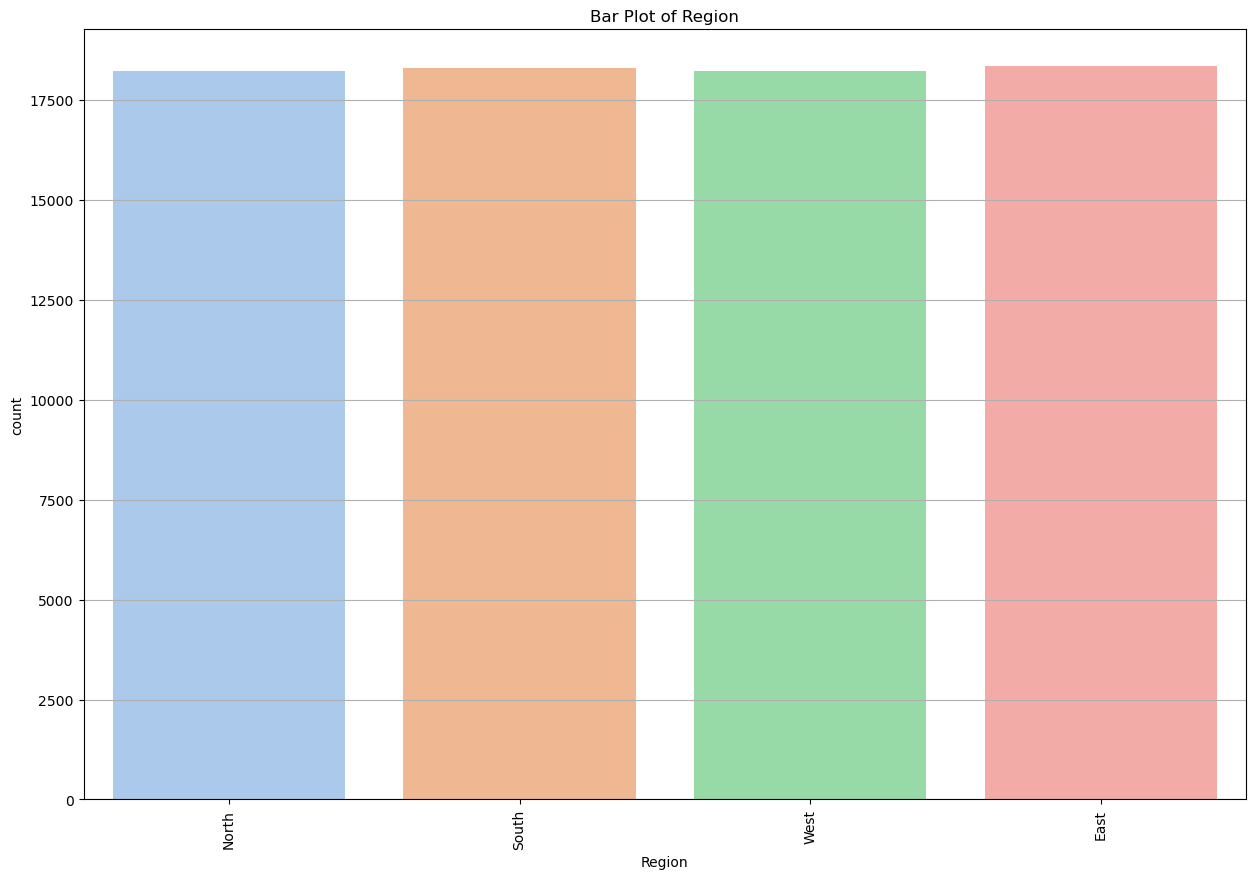

Distribution of Weather:
Weather
Sunny     18290
Rainy     18278
Snowy     18272
Cloudy    18260
Name: count, dtype: int64


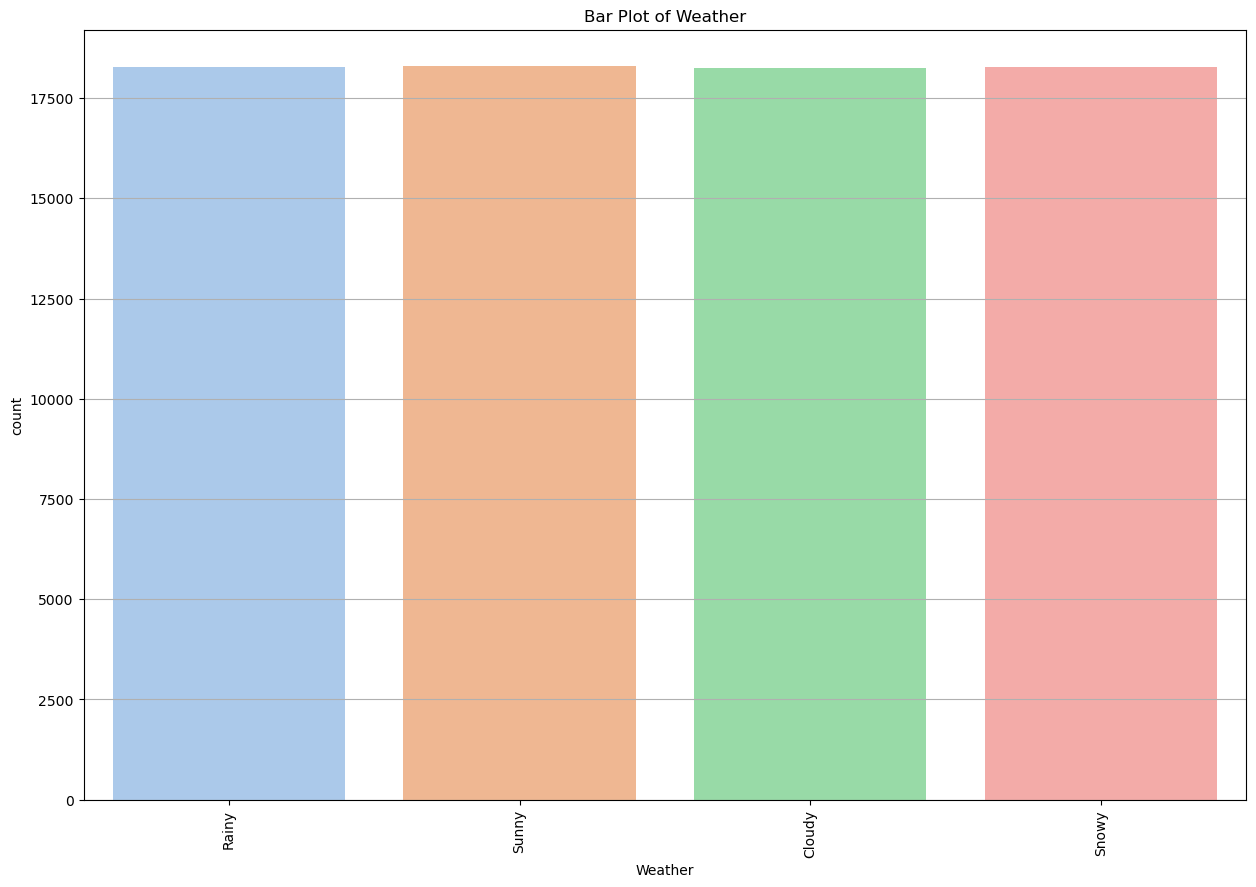

Distribution of Seasonality:
Seasonality
Spring    18317
Summer    18305
Winter    18285
Autumn    18193
Name: count, dtype: int64


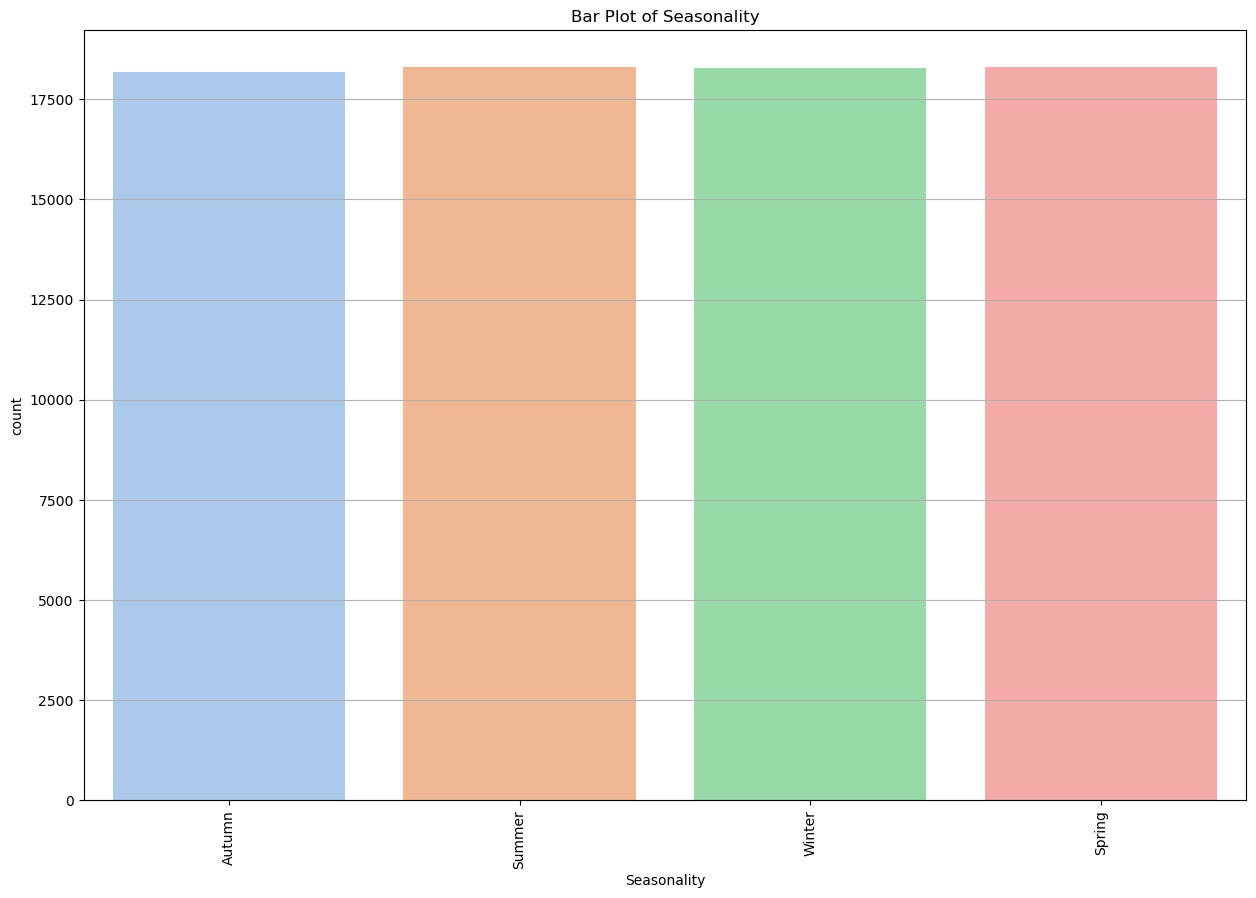

In [42]:
# Countplot for distribution of features and unique values
for col in cat_cols:
    print(f"Distribution of {col}:")
    print(df1[col].value_counts())

    # Bar plot visualization
    plt.figure(figsize=(15, 10))
    sns.countplot(x=col, data=df1,palette='pastel')
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=90)

     # Grid lines only for y-axis
    plt.grid(axis='y')
    
    plt.show()

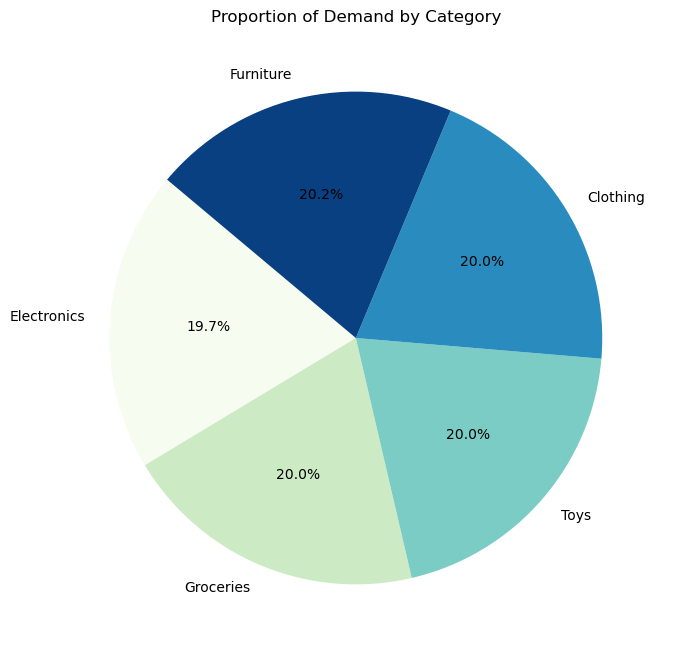

In [43]:
#Pie cahrt for demand distribution across category of products

# Group by category and calculate the sum of the Demand
category_data = df1.groupby('Category')['Demand'].sum().sort_values()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
category_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='GnBu')
plt.title('Proportion of Demand by Category')
plt.ylabel('')  # Hide the y-axis label
plt.show()


## Feature Engineering: Encoding Categorical Variables

In [44]:
# One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['Category', 'Region', 'Weather', 'Seasonality'])

In [45]:
df1

,Inventory,Sales,Orders,Demand,Price,Discount,Promotion,Competitor Pricing,Category_Clothing,Category_Electronics,...,Region_South,Region_West,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,231,11.269428,55,11.639158,33.50,20,0,29.69,False,False,...,False,False,False,True,False,False,True,False,False,False
1,204,12.247449,66,12.001667,63.01,20,0,66.16,False,False,...,True,False,False,False,False,True,True,False,False,False
2,102,8.062258,51,8.603488,27.99,10,1,31.32,False,False,...,False,True,False,False,False,True,False,False,True,False
3,469,7.810250,164,7.885430,32.72,10,1,34.74,False,False,...,False,False,True,False,False,False,True,False,False,False
4,166,3.741657,135,3.043025,73.64,0,0,68.95,False,True,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,96,2.828427,127,4.296510,73.73,20,0,72.45,False,False,...,False,False,False,False,True,False,False,False,False,True
73096,313,7.141428,101,6.959167,82.57,10,0,83.78,False,False,...,False,False,True,False,False,False,True,False,False,False
73097,278,6.000000,151,6.296825,11.11,10,0,10.91,True,False,...,False,True,False,True,False,False,False,False,False,True
73098,374,16.248077,21,16.447492,53.14,20,0,55.80,False,False,...,False,False,False,True,False,False,False,True,False,False


In [46]:
#Converting boolean into int 
boolean_cols = df1.select_dtypes(include='bool').columns

df1[boolean_cols] = df1[boolean_cols].astype(int)

#df1 = df1.astype(int)

In [47]:
df1

,Inventory,Sales,Orders,Demand,Price,Discount,Promotion,Competitor Pricing,Category_Clothing,Category_Electronics,...,Region_South,Region_West,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,231,11.269428,55,11.639158,33.50,20,0,29.69,0,0,...,0,0,0,1,0,0,1,0,0,0
1,204,12.247449,66,12.001667,63.01,20,0,66.16,0,0,...,1,0,0,0,0,1,1,0,0,0
2,102,8.062258,51,8.603488,27.99,10,1,31.32,0,0,...,0,1,0,0,0,1,0,0,1,0
3,469,7.810250,164,7.885430,32.72,10,1,34.74,0,0,...,0,0,1,0,0,0,1,0,0,0
4,166,3.741657,135,3.043025,73.64,0,0,68.95,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,96,2.828427,127,4.296510,73.73,20,0,72.45,0,0,...,0,0,0,0,1,0,0,0,0,1
73096,313,7.141428,101,6.959167,82.57,10,0,83.78,0,0,...,0,0,1,0,0,0,1,0,0,0
73097,278,6.000000,151,6.296825,11.11,10,0,10.91,1,0,...,0,1,0,1,0,0,0,0,0,1
73098,374,16.248077,21,16.447492,53.14,20,0,55.80,0,0,...,0,0,0,1,0,0,0,1,0,0


### Splitting the dataset and setting the target variable

In [48]:
y = df1.Demand

In [49]:
x= df1.drop('Demand', axis=1)

In [50]:
x

,Inventory,Sales,Orders,Price,Discount,Promotion,Competitor Pricing,Category_Clothing,Category_Electronics,Category_Furniture,...,Region_South,Region_West,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,231,11.269428,55,33.50,20,0,29.69,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,204,12.247449,66,63.01,20,0,66.16,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,102,8.062258,51,27.99,10,1,31.32,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,469,7.810250,164,32.72,10,1,34.74,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,166,3.741657,135,73.64,0,0,68.95,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,96,2.828427,127,73.73,20,0,72.45,0,0,1,...,0,0,0,0,1,0,0,0,0,1
73096,313,7.141428,101,82.57,10,0,83.78,0,0,0,...,0,0,1,0,0,0,1,0,0,0
73097,278,6.000000,151,11.11,10,0,10.91,1,0,0,...,0,1,0,1,0,0,0,0,0,1
73098,374,16.248077,21,53.14,20,0,55.80,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Feature Selection: Filter Methods

**SelectKBest Filter**

In [51]:
from sklearn.feature_selection import SelectKBest, f_regression

#Initialize SelectKBest with a scoring function and number of features to select
k_best = SelectKBest(score_func=f_regression, k=14)

#Fit and transform the feature set (X) with respect to the target variable (y)
X_k_best = k_best.fit_transform(x, y)

#Get the scores for each feature
feature_scores = k_best.scores_

#Retrieve the names of the selected features
selected_features = x.columns[k_best.get_support()].tolist()

#selected_features = x.columns

# Output the results
print("SelectKBest Results:")
print(f"Features selected: {len(selected_features)}")
print("Selected features:", selected_features)
print("\nFeature Scores:")
#print(pd.DataFrame({'Feature': x.columns, 'Score': feature_scores}).sort_values(by='Score', ascending=False).head(12))

scores = pd.DataFrame({'Feature': x.columns, 'Score': feature_scores})

scores_sorted = scores.sort_values(by='Score', ascending=False).head(12)

print(scores_sorted)

#Convert X_k_best to a DataFrame for scaling
X_k_best_df = pd.DataFrame(X_k_best, columns=selected_features)


SelectKBest Results:
Features selected: 14
Selected features: ['Inventory', 'Sales', 'Discount', 'Category_Clothing', 'Category_Electronics', 'Category_Furniture', 'Region_South', 'Region_West', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Sunny', 'Seasonality_Autumn', 'Seasonality_Spring', 'Seasonality_Summer']

Feature Scores:
                 Feature         Score
1                  Sales  1.457801e+06
0              Inventory  3.549859e+04
19         Weather_Sunny  5.119258e+00
17         Weather_Rainy  3.823457e+00
8   Category_Electronics  3.642194e+00
20    Seasonality_Autumn  3.365199e+00
22    Seasonality_Summer  2.818431e+00
9     Category_Furniture  1.274719e+00
14          Region_South  8.201037e-01
18         Weather_Snowy  7.773853e-01
15           Region_West  7.106650e-01
21    Seasonality_Spring  4.840751e-01


In [52]:
X_k_best_df.head()

,Inventory,Sales,Discount,Category_Clothing,Category_Electronics,Category_Furniture,Region_South,Region_West,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer
0,231.0,11.269428,20.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,204.0,12.247449,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,102.0,8.062258,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,469.0,7.810250,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,166.0,3.741657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Split Data into Training and Testing Sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_k_best_df, y, test_size = 0.2, random_state=42)

In [54]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train.shape) 
print("Test set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (58480, 14)
Test set shape (features): (14620, 14)
Training set shape (target): (58480,)
Test set shape (target): (14620,)


## Feature Scaling

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (58480, 14)
X_test_scaled shape: (14620, 14)


## Model Building

In [56]:
models={
    'Linear Regression':LinearRegression(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(), 
    'Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    'Support Vector Regressor':SVR()
}

**Model Evaluation**

In [57]:
results = {} # Used to store evaluation results

for model_name, model in models.items():
    # fit the model
    model.fit(X_train_scaled, y_train)
    
    # make the prediction
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Store the results
    results[model_name] = {"MAE":mae, "MSE":mse, "RMSE":rmse, "R2":r2}

results_df = pd.DataFrame(results).T
print(results_df)

                                  MAE       MSE      RMSE        R2
Linear Regression            0.539661  1.062199  1.030630  0.949729
Decision Tree Regressor      0.675705  1.501675  1.225429  0.928929
Random Forest Regressor      0.514479  0.807333  0.898517  0.961791
Gradiant Boosting Regressor  0.494063  0.727590  0.852989  0.965565
Support Vector Regressor     0.500633  0.871117  0.933337  0.958772


In [58]:
# Finding the best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Gradiant Boosting Regressor


## HyperParameter Tuning

In [59]:
# Define parameter grid
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

In [60]:
# Initialize model and GridSearchCV
gb_model = GradientBoostingRegressor()

grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

In [61]:
# Fit the Grid Search to the data
grid_search_gb.fit(X_train_scaled, y_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = -grid_search_gb.best_score_  # Negative MSE is returned, convert to positive
print(f"Best Parameters: {best_params_gb}")
print(f"Best Score (MSE): {best_score_gb}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score (MSE): 0.6965201553329262


**Evaluation after tuning**

In [62]:
# Initialize the Gradient Boosting Regressor with tuned parameters
final_model = GradientBoostingRegressor(
    n_estimators= 100,
    learning_rate=0.05,
    max_depth=3
)

# Fit the model to the training data
final_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_tuned = final_model.predict(X_test_scaled)

# Calculate performance metrics
final_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred_tuned ),
    'MSE': mean_squared_error(y_test, y_pred_tuned ),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_tuned )),
    'R2': r2_score(y_test, y_pred_tuned )
}

# Print final metrics
print("\nModel Performance After Tuning:")
for metric_name, value in final_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Model Performance After Tuning:
MAE: 0.4928
MSE: 0.7256
RMSE: 0.8518
R2: 0.9657


**Saving the model**

In [63]:
print("Saving model...")
joblib.dump(best_model_name, 'Gradient_Boosting_Model.joblib')
print("Model Saved")

Saving model...
Model Saved


## Creating Pipeline

In [64]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('model', GradientBoostingRegressor(
    n_estimators= 100,
    learning_rate=0.1,
    max_depth=3
    ))       
])
# Train the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor())])

In [65]:
# Predict on test data
y_pred = pipeline.predict(X_test)

**Saving the Pipeline**

In [66]:
joblib.dump(pipeline, 'Gradient_Regressor_pipeline.joblib')

['Gradient_Regressor_pipeline.joblib']

## Testing with Unseen data

**Load the pipeline**

In [67]:
loaded_pipeline = joblib.load('Gradient_Regressor_pipeline.joblib')

**Load the unseen data**

In [77]:
unseen_data = pd.read_csv('unseen_test_data.csv')
unseen_data

,Inventory,Sales,Discount,Category_Clothing,Category_Electronics,Category_Furniture,Region_South,Region_West,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Y_demand
0,225,11.747340,0,0,1,0,0,0,0,1,0,0,0,0,11.802966
1,200,10.246951,15,0,0,0,0,0,0,0,0,0,1,0,10.842048
2,145,8.366600,15,1,0,0,0,0,0,1,0,0,0,0,8.860587
3,350,10.246951,15,0,1,0,0,1,0,0,1,0,1,0,10.154309
4,145,8.717798,20,0,0,0,0,0,0,0,1,0,0,0,9.616132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,401,11.958261,5,0,0,0,1,0,0,1,0,0,0,1,12.405644
996,423,20.297783,0,0,0,0,0,0,0,0,0,0,0,0,20.585918
997,237,12.328828,20,0,0,1,0,0,1,0,0,0,1,0,11.918893
998,275,12.041595,10,0,0,0,0,1,0,1,0,0,1,0,12.771844


**Splitting X&Y of Unseen Data**

In [78]:
X_unseen = unseen_data.drop('Y_demand', axis=1)
y_actual = unseen_data['Y_demand']

**Prediction With Unseen Data**

In [79]:
y_unseen_pred = loaded_pipeline.predict(X_unseen)

In [80]:
unseen_data['unseen_predictions'] = y_unseen_pred

In [81]:
unseen_data

,Inventory,Sales,Discount,Category_Clothing,Category_Electronics,Category_Furniture,Region_South,Region_West,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Y_demand,unseen_predictions
0,225,11.747340,0,0,1,0,0,0,0,1,0,0,0,0,11.802966,11.908065
1,200,10.246951,15,0,0,0,0,0,0,0,0,0,1,0,10.842048,10.460053
2,145,8.366600,15,1,0,0,0,0,0,1,0,0,0,0,8.860587,8.659764
3,350,10.246951,15,0,1,0,0,1,0,0,1,0,1,0,10.154309,10.460562
4,145,8.717798,20,0,0,0,0,0,0,0,1,0,0,0,9.616132,8.932594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,401,11.958261,5,0,0,0,1,0,0,1,0,0,0,1,12.405644,12.163611
996,423,20.297783,0,0,0,0,0,0,0,0,0,0,0,0,20.585918,20.403206
997,237,12.328828,20,0,0,1,0,0,1,0,0,0,1,0,11.918893,12.577977
998,275,12.041595,10,0,0,0,0,1,0,1,0,0,1,0,12.771844,12.169215


In [82]:
#Transform the DataFrame to a csv file
unseen_data.to_csv('unseen_test_data.csv',index=False)

**Evaluation with unseen data**

In [83]:
print(f"Model Performance on Unseen Data:")
print(f"MAE: {mean_absolute_error(y_actual, y_unseen_pred):.2f}")
print(f"MSE: {mean_squared_error(y_actual, y_unseen_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_actual, y_unseen_pred)):.2f}")
print(f"R²: {r2_score(y_actual, y_unseen_pred):.4f}")


Model Performance on Unseen Data:
MAE: 0.48
MSE: 0.68
RMSE: 0.83
R²: 0.9671


## Conclusions

**Key findings:**
* Gradient Boosting Regressor is the best-performing model with tuned metrics: MAE (0.4933), MSE    (0.7230), RMSE (0.8503), and R² (0.9658).
* On unseen data, the model maintained robust performance: MAE (0.48), MSE (0.68), RMSE (0.83),     and R² (0.9671), demonstrating excellent generalization. This indicates the model's ability to    generalize effectively to new datasets and its reliability for real-world applications.
  
**Feature Importance:**
* Sales and Inventory are the most influential predictors of demand.
* External factors like weather and seasonality moderately influence predictions, while category    and region have lesser impact.

**Limitations:**
* The dataset may lack representation of external macroeconomic factors (e.g., market trends,       competitor data), which could further enhance predictive accuracy.
* Limited influence of categorical and regional factors suggests the need for more granular data.


## Future Work

* **Experiment with Advanced Algorithms:** Explore deep learning models like LSTMs or Transformers to capture complex patterns and temporal dependencies in the data.
* **Periodic Updates:** Regularly retrain the model with updated data to account for shifts in demand patterns and market conditions.
* **Address Data Imbalances:** Use resampling techniques (SMOTE, oversampling, or undersampling) to handle imbalanced categories and improve prediction accuracy for underrepresented segments.
* **Scalability and Deployment:** Optimize the pipeline for scalability and deploy it as a cloud-based service for real-time demand forecasting across various retailers.